In [263]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [199]:
df = pd.read_csv('train.csv', header=0, names=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

In [224]:
y = df['Survived']
df_y = pd.DataFrame(y)


In [225]:
embarked = df['Embarked'].drop_duplicates()
embarked_df = pd.DataFrame(embarked).reset_index(drop=True)
embarked_df['embarked_int'] = embarked_df.index

In [226]:
gender = df['Sex'].drop_duplicates()
gender_df = pd.DataFrame(gender).reset_index(drop=True)
gender_df['sex_int'] = gender_df.index

In [227]:
cabin = df['Cabin'].drop_duplicates()
cabin_df = pd.DataFrame(cabin).reset_index(drop=True)
cabin_df['cabin_int'] = cabin_df.index

In [228]:
df_merged_embarked = pd.merge(df, embarked_df, on='Embarked', how='left')

In [229]:
df_merged_embarked_sex = pd.merge(df_merged_embarked, gender_df, on='Sex', how='left')

In [230]:
df_merged_embarked_sex_cabin = pd.merge(df_merged_embarked_sex, cabin_df, on='Cabin', how='left')

In [231]:
df_final = df_merged_embarked_sex_cabin[['Pclass','sex_int','Age', 'SibSp','Parch','Fare','cabin_int', 'embarked_int']]

In [261]:
df_final = df_final.fillna(0)
df_final_train, df_final_test, df_y_train, df_y_test = train_test_split(df_final, df_y, test_size=0.33, random_state=42)


In [278]:
k_range = range(1, 15)
scores = []
for k in k_range:
    knn = knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_final_train, df_y_train)
    df_y_pred = knn.predict(df_final_test)
    scores.append(metrics.accuracy_score(df_y_test, df_y_pred))

/Users/lap00346/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


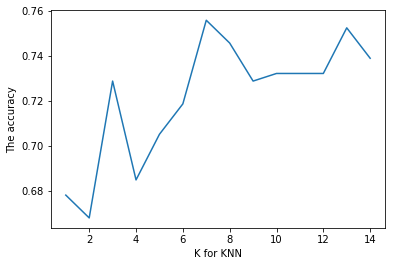

In [279]:
import matplotlib.pyplot as ptl
%matplotlib inline
ptl.plot(k_range, scores)
ptl.xlabel('K for KNN')
ptl.ylabel('The accuracy')